In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
rm_model_path = "ckpts/rm2_linguistic_equivalence_ctrex_llama7B_2gpu/checkpoint_20000/hf_model/"
rm_model_log_probs = np.load(rm_model_path + "sft_ctrex_llama7B_2_commit_lr1e-5_2_oodsmallYesNo_yes_log_probs.npy")
labels = np.load("ckpts/ppo_rm_ctrex_llama7B_commit30_idk10/checkpoint_030000/hf_model/generation_categories_oodsmall.npy")
generated_responses = np.load("ckpts/ppo_rm_ctrex_llama7B_commit30_idk10/checkpoint_030000/hf_model/output_strings_oodsmall.npy")


In [10]:
generated_responses[np.where(np.e**rm_model_log_probs>0.87)[0]]

IndexError: index 5045 is out of bounds for axis 0 with size 5000

In [12]:
len(generated_responses)

5000

(array([ 1.,  1.,  4.,  3.,  2.,  9.,  6., 19., 26., 24.]),
 array([0.76942934, 0.79190949, 0.81438963, 0.83686978, 0.85934992,
        0.88183006, 0.90431021, 0.92679035, 0.9492705 , 0.97175064,
        0.99423078]),
 <BarContainer object of 10 artists>)

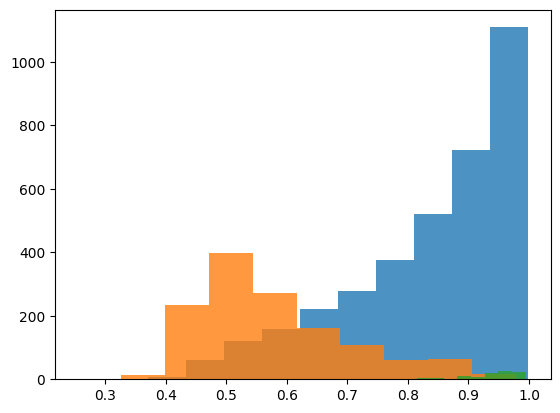

In [7]:
plt.hist(np.e**rm_model_log_probs[np.where(labels[:, 2]==1)[0]], alpha=0.8)
plt.hist(np.e**rm_model_log_probs[np.where(labels[:, 3]==1)[0]], alpha=0.8)
plt.hist(np.e**rm_model_log_probs[np.where(labels[:, 1]==1)[0]], alpha=0.8)


In [ ]:

rm_model_path = "ckpts/rm2_linguistic_equivalence_ctrex_llama7B_2gpu/checkpoint_20000/hf_model/"
# rm_model_path = "ckpts/rm_ctrex_llama7B_2gpu/checkpoint_20000/hf_model/"

sft_model_path = "ckpts/sft_ctrex_llama7B_2_commit_lr1e-5_2/checkpoint_30000/hf_model/"

: 

In [17]:
sft_linguistic_equivalence = np.load(sft_model_path + "output_strings_oodsmall_linguistic_equivalence2.npy")
# sft_log_probs = np.load(sft_model_path + "oodsmallYesNo_log_probs_mean.npy")
sft_log_probs = np.load(sft_model_path + "generated_answer_log_probs_mean_ood_small.npy")

In [18]:
rm_model_generations = np.load(rm_model_path + "sft_ctrex_llama7B_2_commit_lr1e-5_2_oodsmallYesNo_answer_types.npy")
rm_model_log_probs = np.load(rm_model_path + "sft_ctrex_llama7B_2_commit_lr1e-5_2_oodsmallYesNo_yes_log_probs.npy")

# rm_model_generations = np.load(rm_model_path + "sft_ctrex_llama7B_2_commit_lr1e-5_2_oodsmall_answer_types.npy")
# rm_model_log_probs = np.load(rm_model_path + "sft_ctrex_llama7B_2_commit_lr1e-5_2_oodsmall_yes_log_probs.npy")

In [19]:
# ground_truth_yes_idxs = np.where(sft_linguistic_equivalence==1)[0]
# ground_truth_no_idxs = np.where(sft_linguistic_equivalence==0)[0]

# rm_model_log_probs.shape
ground_truth_yes_idxs = np.arange(0, 5000)
ground_truth_no_idxs = np.arange(5000, 10000)

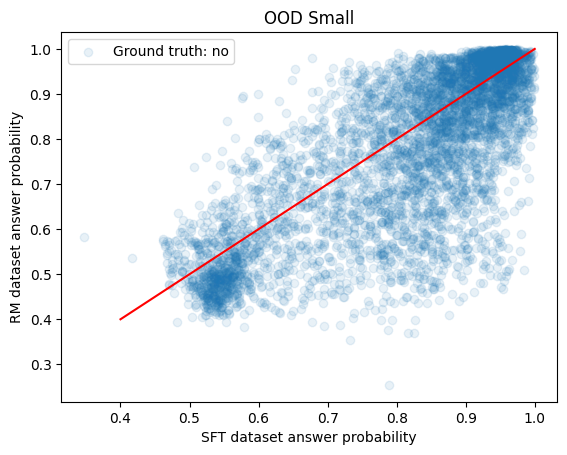

In [21]:
# plt.scatter(np.e**sft_log_probs[ground_truth_yes_idxs], np.e**rm_model_log_probs[ground_truth_yes_idxs], alpha=0.1, label="Ground truth: yes")
# plt.scatter(np.e**sft_log_probs[ground_truth_no_idxs], np.e**rm_model_log_probs[ground_truth_no_idxs], alpha=0.1, label="Ground truth: no")


plt.scatter(np.e**sft_log_probs, np.e**rm_model_log_probs[:5000], alpha=0.1, label="Ground truth: no")


# plt.ylim(0.4,1)
# plt.xlim(0.4,1)
plt.plot([0.4,1],[0.4,1], color="red")
plt.xlabel("SFT dataset answer probability")
plt.ylabel("RM dataset answer probability")
plt.title("OOD Small")
plt.legend()


(0.0, 10.0)

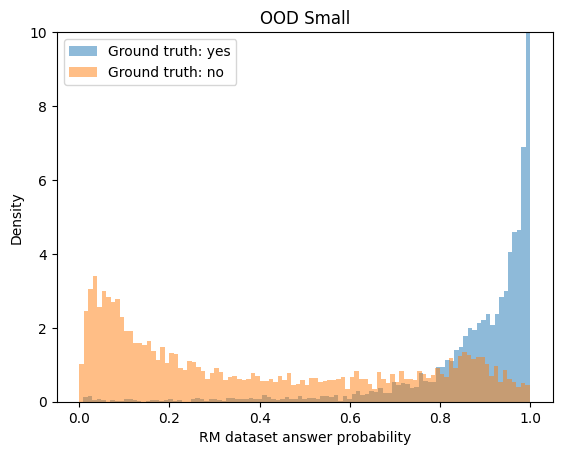

In [43]:
plt.hist(np.e**rm_model_log_probs[ground_truth_yes_idxs], bins=100, alpha=0.5, label="Ground truth: yes", density=True)
plt.hist(np.e**rm_model_log_probs[ground_truth_no_idxs], bins=100, alpha=0.5, label="Ground truth: no", density=True)
plt.legend()
plt.title("OOD Small")
plt.xlabel("RM dataset answer probability")
plt.ylabel("Density")
# plt.xlim(0.3,1)
plt.ylim(0, 10)

Text(0, 0.5, 'Density')

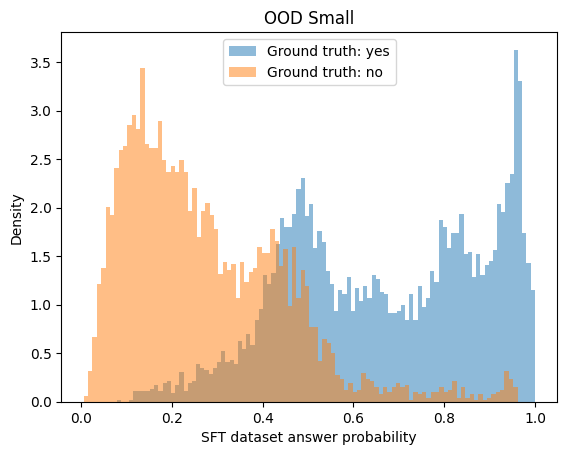

In [31]:
plt.hist(np.e**sft_log_probs[ground_truth_yes_idxs], bins=100, alpha=0.5, label="Ground truth: yes", density=True)
plt.hist(np.e**sft_log_probs[ground_truth_no_idxs], bins=100, alpha=0.5, label="Ground truth: no", density=True)
plt.legend()
plt.title("OOD Small")
plt.xlabel("SFT dataset answer probability")
plt.ylabel("Density")
# plt.xlim(0.3,1)